In [1]:
import pandas as pd

In [2]:
ipca = pd.read_csv('results-20210713-203638.csv')

### agrupando os dados do índice de preços por ano

In [3]:
ipca_ano = ipca.groupby('ano').sum()

### quero normalizar o somatório anual do índice de preços

In [4]:
import numpy as np

In [5]:
ipca_ano['normalized']=ipca_ano['indice']/7998.59

In [6]:
ipca_ano=ipca_ano.drop(columns=['mes'])

In [8]:
ipca_ano

,indice,normalized
ano,,
1994,7998.59,1.000000
1995,13353.08,1.669429
1996,15529.67,1.941551
1997,16619.46,2.077799
1998,17185.64,2.148584
1999,17968.36,2.246441
2000,19271.51,2.409363
2001,20582.83,2.573307
2002,22253.78,2.782213


### carregando a série histórica de desemprego da PNADC

Os microdados vêm relacionados por trimestre e ano. A série histórica se inicia em 2012; irei utilizar apenas dados referentes ao último trimestre de cada ano, já que estou utilizando o acumulado do índice de preços anual como referência.

In [20]:
pnad = pd.read_csv('PNADC.csv')

In [24]:
pnad=pnad.rename(columns={'vd4001':'forca_trabalho','vd4002':'ocupacao',	'vd4009':'condicao_na_ocupacao'})

In [26]:
def selecao(ano):
    return pnad[pnad['ano']==ano]

In [27]:
#carregando a seleção ano a ano
p_2012=selecao(2012)
p_2013=selecao(2013)
p_2014=selecao(2014)
p_2015=selecao(2015)
p_2016=selecao(2016)
p_2017=selecao(2017)
p_2018=selecao(2018)
p_2019=selecao(2019)
p_2020=selecao(2020)

agora, preciso criar a taxa de desemprego anual: verifico a quantidade de pessoas na força de trabalho e utilizo a razão desempregados/força de trabalho

In [44]:
def forcat(ano):
    return ano[ano['forca_trabalho']==1]
def desem(ano):
    return ano[ano['ocupacao']==2]

In [46]:
forca_de_trabalho=[]
desempregados=[]
ano=[]
i=2012
while i <2021:
    ano.append(i)
    i+=1

In [47]:
forca_de_trabalho.append(len(forcat(p_2012)))
forca_de_trabalho.append(len(forcat(p_2013)))
forca_de_trabalho.append(len(forcat(p_2014)))
forca_de_trabalho.append(len(forcat(p_2015)))
forca_de_trabalho.append(len(forcat(p_2016)))
forca_de_trabalho.append(len(forcat(p_2017)))
forca_de_trabalho.append(len(forcat(p_2018)))
forca_de_trabalho.append(len(forcat(p_2019)))
forca_de_trabalho.append(len(forcat(p_2020)))
desempregados.append(len(desem(p_2012)))
desempregados.append(len(desem(p_2013)))
desempregados.append(len(desem(p_2014)))
desempregados.append(len(desem(p_2015)))
desempregados.append(len(desem(p_2016)))
desempregados.append(len(desem(p_2017)))
desempregados.append(len(desem(p_2018)))
desempregados.append(len(desem(p_2019)))
desempregados.append(len(desem(p_2020)))

In [58]:
desemp=pd.DataFrame({'forca_de_trabalho':forca_de_trabalho,'desemprego(pessoas)':desempregados,'ano':ano})
desemp['taxa_desemp']=(desemp['desemprego(pessoas)']/desemp['forca_de_trabalho'])*100

In [61]:
agregado=desemp.join(ipca_ano,on='ano')

In [62]:
agregado

,forca_de_trabalho,desemprego(pessoas),ano,taxa_desemp,indice,normalized
0,260765,17234,2012,6.609016,41173.13,5.147549
1,266735,15675,2013,5.876619,43716.00,5.465463
2,270382,16260,2014,6.013714,46457.52,5.808214
3,266631,21727,2015,8.148715,50583.44,6.324045
4,268766,30555,2016,11.368625,55147.36,6.894635
5,266798,29576,2017,11.085540,57152.61,7.145336
6,263739,28967,2018,10.983207,59237.90,7.406043
7,258319,27034,2019,10.465355,61415.44,7.678283
8,150920,19504,2020,12.923403,63362.26,7.921679


In [71]:
import matplotlib.pyplot as pltb
from matplotlib.pyplot import figure

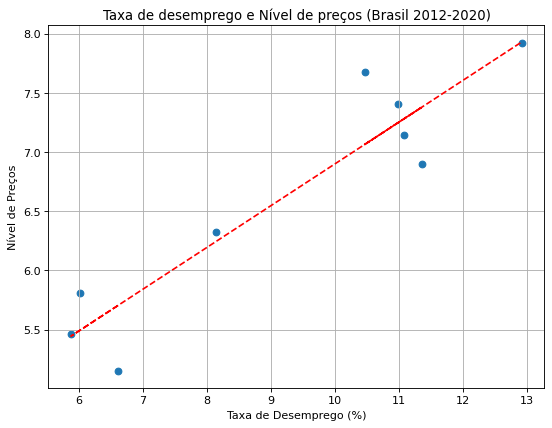

In [72]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(agregado['taxa_desemp'],agregado['normalized'])
plt.xlabel('Taxa de Desemprego (%)')
plt.ylabel('Nível de Preços')
plt.grid()
plt.title('Taxa de desemprego e Nível de preços (Brasil 2012-2020)')

z = np.polyfit(agregado['taxa_desemp'], agregado['normalized'], 1)
p = np.poly1d(z)
plt.plot(agregado['taxa_desemp'],p(agregado['taxa_desemp']),"r--")
plt.show()